
#  Ames Housing Data and Kaggle Challenge

The goal of this project is to predict the price of homes at sale for the Ames Iowa Housing dataset, which was provided by Kaggle in this site. https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/overview

By exploring the dataset with 80 attributes related to the sale of the property, we will gain insight of which variables are highly correlated and create several regression models by selecting set of fields through iterative process, and choose the best one that can closely estimate the sale price.

## Part 1: EDA and Cleaning
### This notebook can be used to preprocess both Train and Test datasets

- read, cleanup and save preprocessed data for both train and test
- drop records only for train dataset
- see #configuration variable  below after #import packages


In [1]:
#import packages
import pandas as pd
import matplotlib #to print version
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#import linear_model to replace null values based on linear regression
import sklearn   #to print version
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [2]:
#show versions of packages
print('pandas: ', pd.__version__)
print('matplotlib: ', matplotlib.__version__)
print('seaborn: ', sns.__version__)
print('numpy: ', np.__version__)
print('sklearn', sklearn.__version__)

pandas:  1.3.4
matplotlib:  3.3.4
seaborn:  0.11.1
numpy:  1.21.4
sklearn 0.24.1


In [3]:
#configuration variable 
#True will load train.csv, False will load test.csv
is_train_dataset = True

In [4]:
#this function will plot the categorical using boxplot, sorting from lowest to highest 
#median using SalePrice
#and for numerical, it will use scatterplot

def subplot_corr(df, col, is_categorical=False):
    
    nrows = int(np.ceil(len(col)/2)) #length of columns divided by 2 is our number of rows
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) #2 columns by nrows
    ax = ax.ravel() 
        
    for x in range(len(col)): # Gives us an index value to get into all our lists
        
        if is_categorical:
            #sns.boxplot(data=df, x=col[x],y='SalePrice' ,ax = ax[x])  
            
            grouped = df.loc[:,[col[x], 'SalePrice']] \
                .groupby(col[x]) \
                .mean() \
                .sort_values(by='SalePrice')

            sns.boxplot(data=df_ames, x=col[x], y='SalePrice', order=grouped.index,ax = ax[x])
            
        else:
            sns.regplot(data=df, x=col[x],y='SalePrice' ,ax = ax[x])
            
        ax[x].set_title(col[x] +' vs SalePrice', fontsize =10)
        ax[x].set_ylabel('SalePrice',fontsize=5)
        ax[x].set_xlabel(col[x],fontsize=5)  
        ax[x].spines["top"].set_visible(False)  
        ax[x].spines["right"].set_visible(False) 
        
    plt.tight_layout()

## Loading of  Dataset 

In [5]:
if is_train_dataset:
    df_ames = pd.read_csv("../datasets/train.csv")
    print("Loading train.csv")
else:
    df_ames = pd.read_csv("../datasets/test.csv")
    print("Loading test.csv")
    
df_ames.head()

Loading train.csv


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
df_ames.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [7]:
#check the data points and column count
df_ames.shape

(2051, 81)

### Exploratory Data Analysis

In [8]:
#Check for missing values
null_vals = df_ames.isnull().sum()[df_ames.isnull().sum()>0].sort_values()

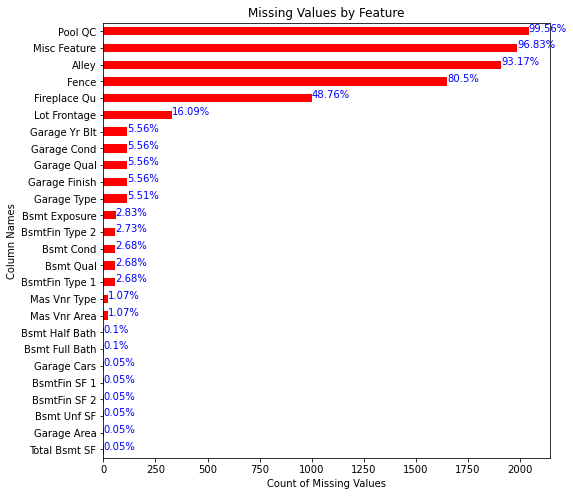

In [9]:
#visualizing null values, from highest to lowest
null_vals.plot(kind='barh',figsize=(8, 8), color='red');

for ctr,val in enumerate(null_vals):
    plt.annotate(str(round(val/2051*100,2))+'%', xy=(val,ctr), size=10, color='blue')

plt.xlabel('Count of Missing Values');
plt.ylabel('Column Names');
plt.title("Missing Values by Feature");

In [10]:
#First of all, let's remove features with large proportion of missing values, 20%
#Alley, Pool QC, Misc Feature, Fence

df_ames.drop(columns=['Alley','Pool QC', 'Misc Feature','Fence'], inplace=True)

## Correlation

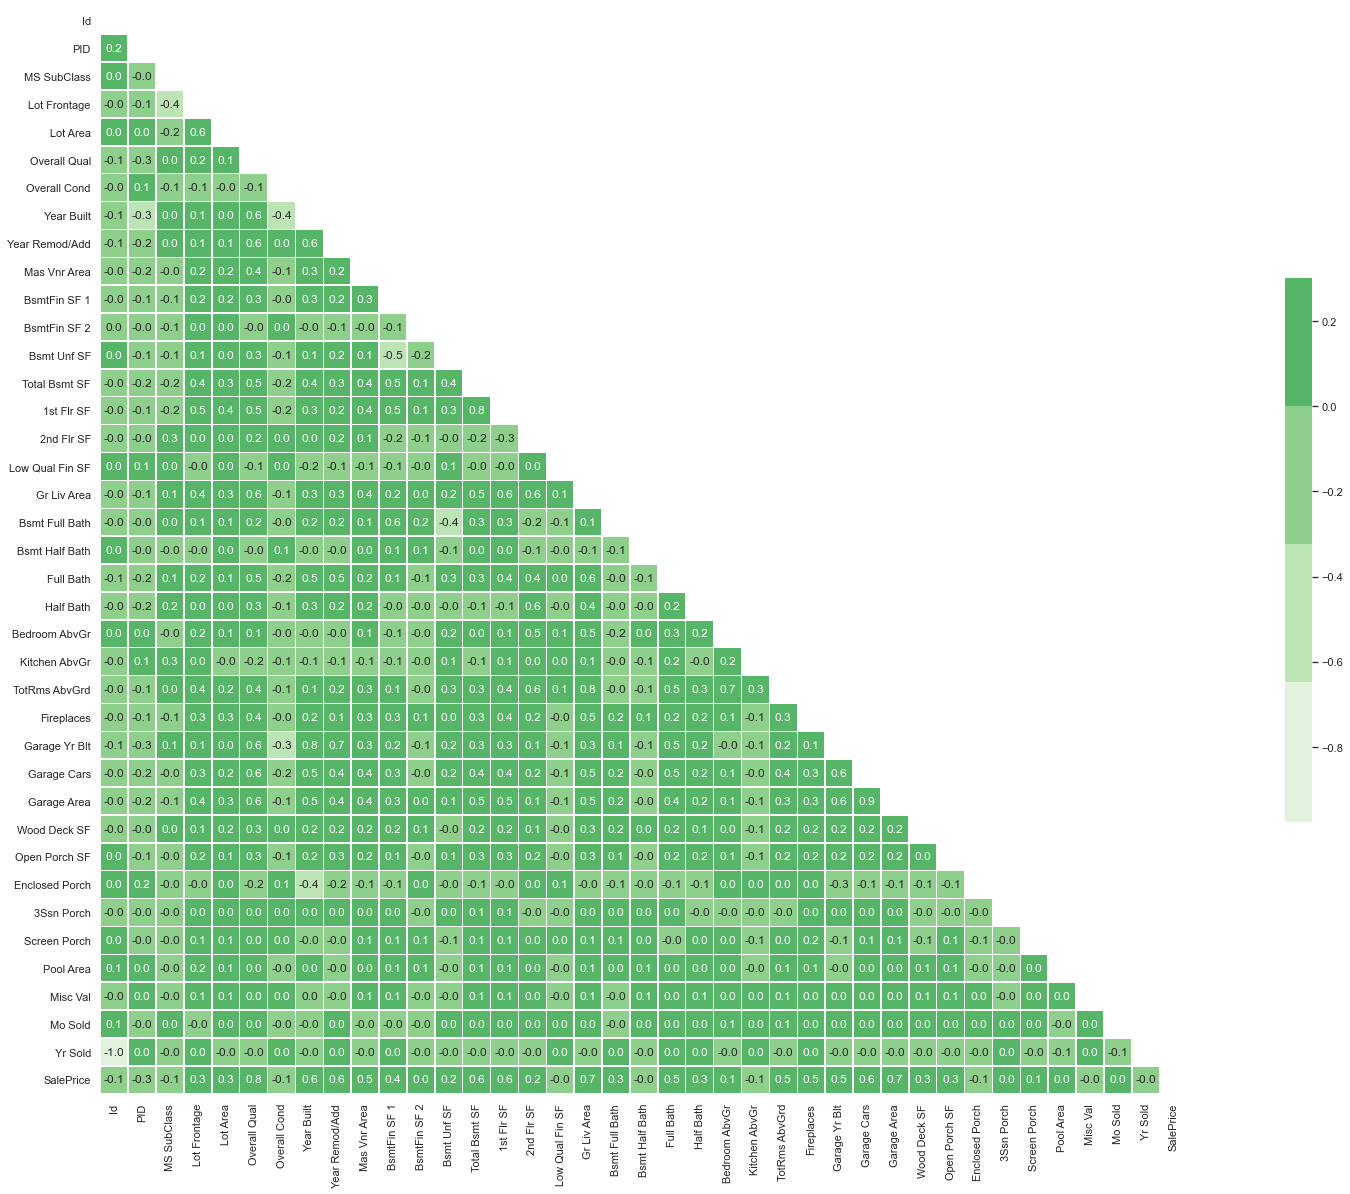

In [11]:
#plot the correlation of all numeric variables

if is_train_dataset:
    sns.set(style="white")
    
    corr = df_ames.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
   
    # creating a colormap
    colormap = sns.color_palette("Greens")

    plt.figure(figsize=(35,20))
    sns.heatmap(corr, mask=mask, cmap=colormap, vmax=.3, center=0, annot=True, fmt='.1f',
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

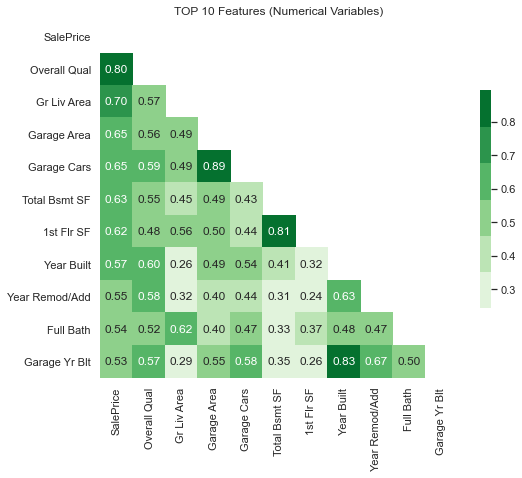

In [12]:
## Lets look at our TOP 10 features
if is_train_dataset:
    plt.figure(figsize=(8,8))
    sns.set(style="white")

    k = 11
    cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
    corr_10 =  df_ames[cols].corr()
    
    mask = np.zeros_like(corr_10)
    mask[np.triu_indices_from(mask)] = True
    plt.title('TOP 10 Features (Numerical Variables)')
    sns.heatmap(corr_10, annot=True,mask=mask, square=True, fmt='.2f', cbar_kws={"shrink": .5}, cmap=colormap)

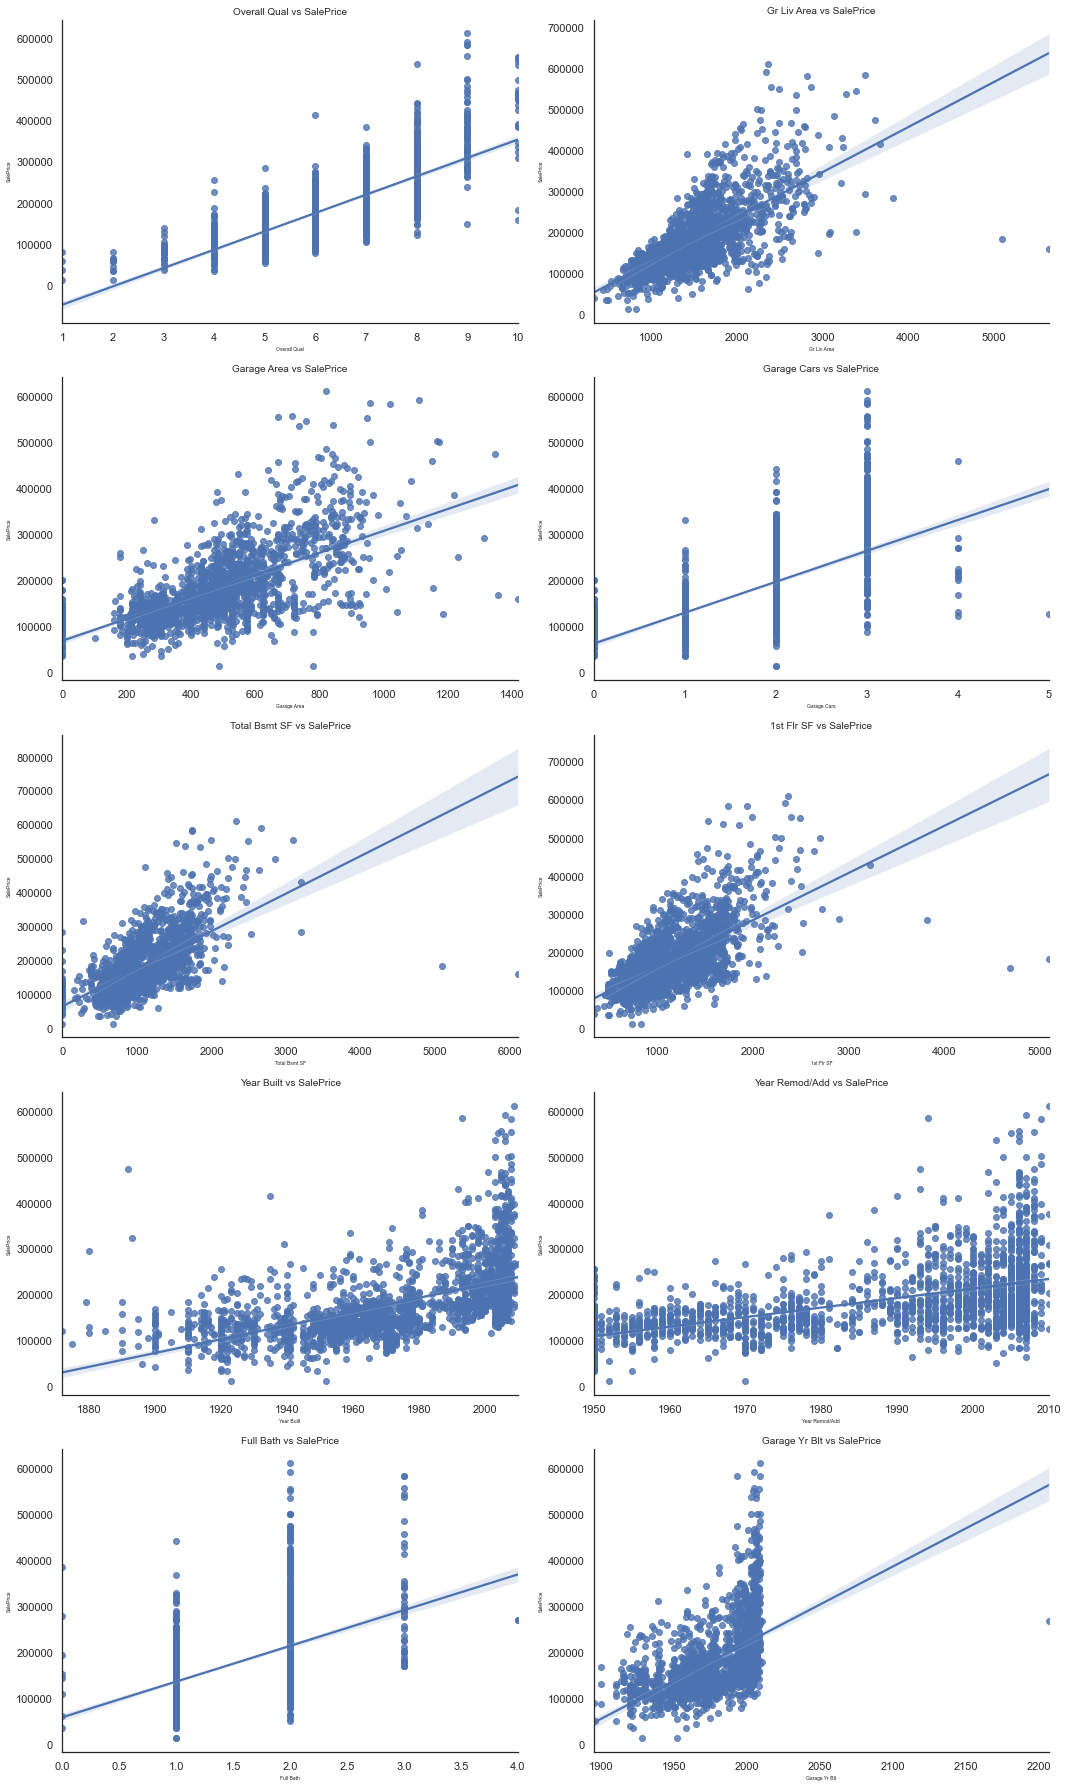

In [13]:
#using scatter plot to visualize TOP 10 variables
if is_train_dataset:
    corr_features = corr_10[1:].index
    subplot_corr(df_ames,corr_features, is_categorical=False);
    

Top 10 Features shows linear correlation with the SalePrice

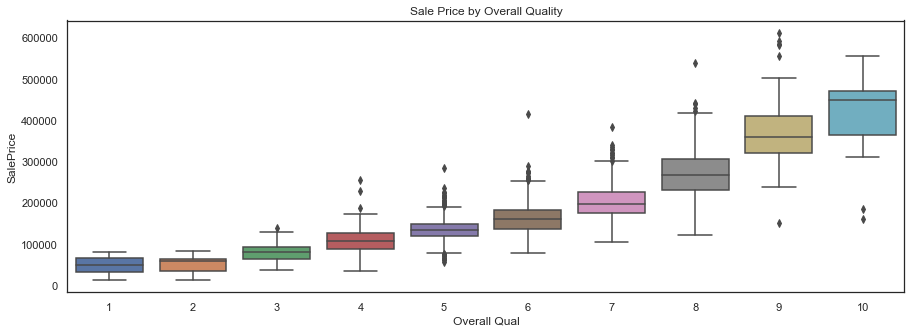

In [14]:
#TOP 1
#overall quality has the highest correlation with SalePrice
if is_train_dataset:
    plt.figure(figsize=(15,5))
    sns.boxplot(x=df_ames["Overall Qual"], y=df_ames["SalePrice"] ).set_title("Sale Price by Overall Quality");


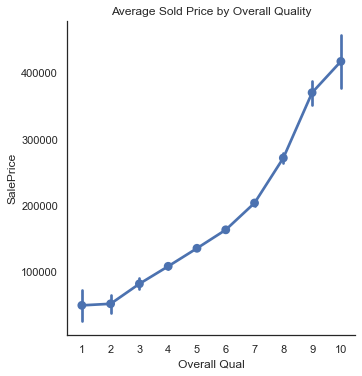

In [15]:
#for EDA, simple graph please!
if is_train_dataset:
    sns.catplot(data=df_ames, x="Overall Qual", y="SalePrice", kind='point')
    plt.title("Average Sold Price by Overall Quality");

***Boxplot below shows the lower the quality (from 1 as lowest to 10 the highest) 
the lower the quaity the lower the average SalePrice***

In [16]:
#looking at the figures, how much does it change per unit increase in rating?
if is_train_dataset:
    df_ames.groupby("Overall Qual")["SalePrice"].mean()

## CATEGORICAL variables

In [17]:
#store the categorical variables/features
var_categorical = df_ames.select_dtypes(include = 'object').columns
var_categorical

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type'],
      dtype='object')

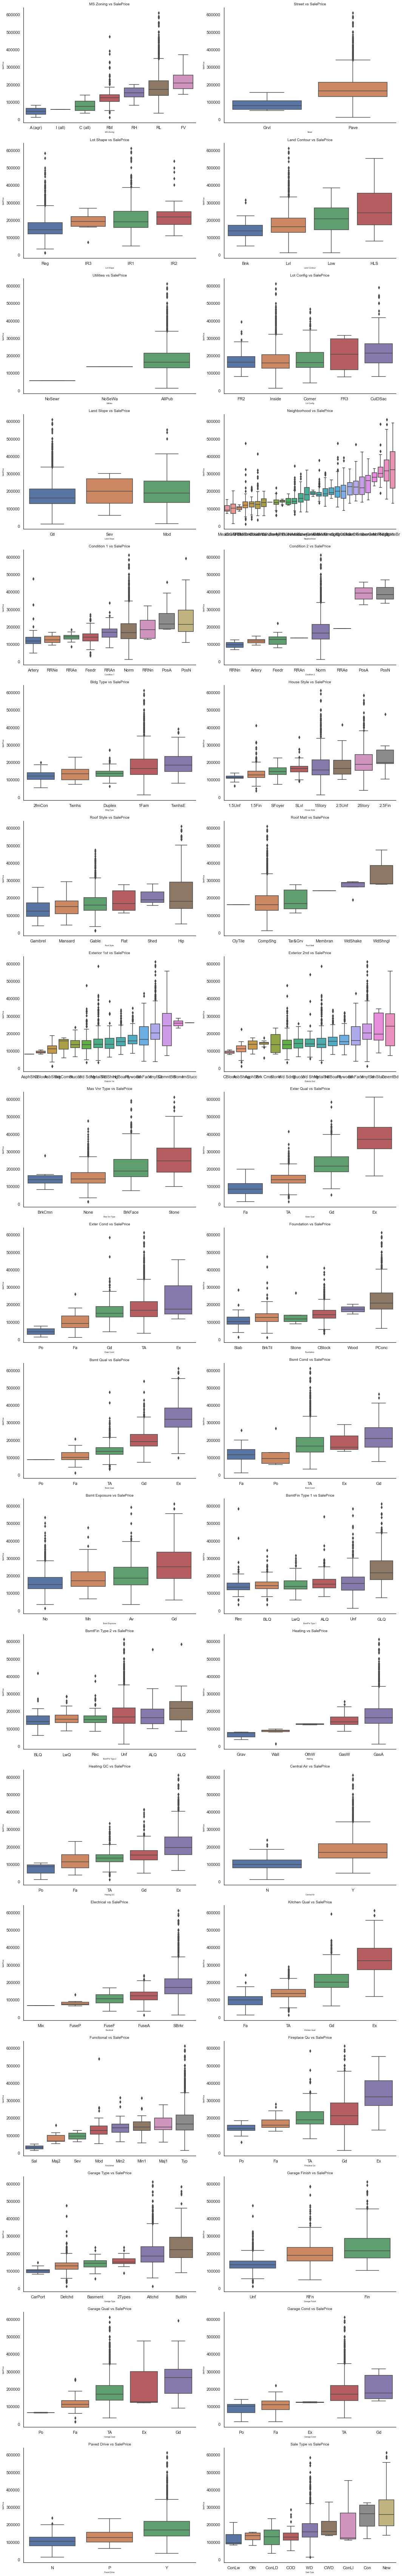

In [18]:
#plot the categorical variables for exploratory analysis
#this is arranged from lowest to highest median of SalePrice 
if is_train_dataset:
    subplot_corr(df_ames,var_categorical, is_categorical=True);

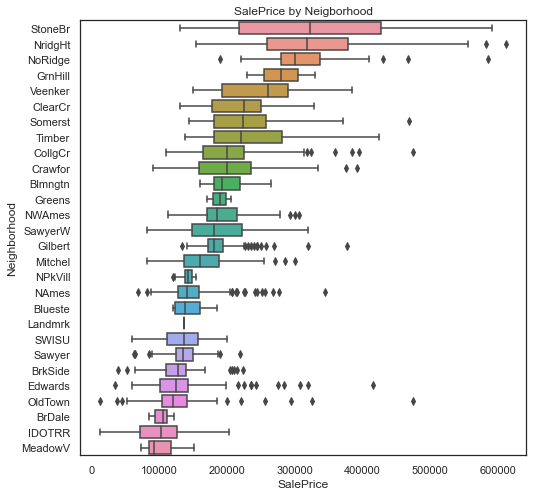

In [19]:
## Aside from the  size, another one that we always hear when it comes to property.. 
## "Location, Location, Location!""
##lets zoom in the neighborhood to see if there's any strong correlation  with SalePrice

if is_train_dataset:
    plt.figure(figsize=(8,8))
    grouped = df_ames.loc[:,['Neighborhood', 'SalePrice']] \
                .groupby('Neighborhood') \
                .median() \
                .sort_values(by='SalePrice', ascending=False) 

    sns.boxplot(data=df_ames, y='Neighborhood', x='SalePrice', order=grouped.index, orient = "h").set_title("SalePrice by Neigborhood")
    
#top 3 neighborhood where the ave Selling Price is > 250K
#NridgHt, GrnHill, NoRidge

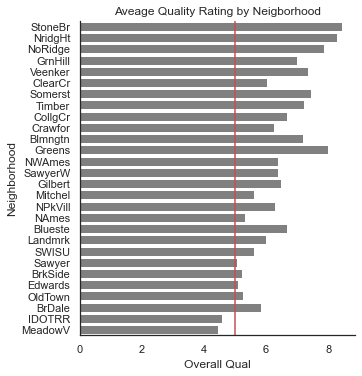

In [20]:
#This one is also for presentation, for non-technical user

if is_train_dataset:
    sns.catplot(data=df_ames, y='Neighborhood', x='Overall Qual', color = 'gray', kind='bar', order=grouped.index, orient = "h", ci=None)
    plt.title("Aveage Quality Rating by Neigborhood");
    plt.axvline(x= 5, color = 'r', linestyle = '-')

In [21]:
df_ames['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

#### Below analysis on neighborhood and it's quality will aid in the Business Problem presentation

In [22]:
##What are the Neighborhood with high mean SalePrice, let say above 75% percentile
if is_train_dataset:
    print(grouped[(grouped['SalePrice'] > df_ames['SalePrice'].quantile(0.75))])
    neighborhood_75quantile = grouped[(grouped['SalePrice'] > df_ames['SalePrice'].quantile(0.75))].index
    print(neighborhood_75quantile)

              SalePrice
Neighborhood           
StoneBr        322450.0
NridgHt        317500.0
NoRidge        300750.0
GrnHill        280000.0
Veenker        260000.0
ClearCr        225000.0
Somerst        224000.0
Timber         220000.0
Index(['StoneBr', 'NridgHt', 'NoRidge', 'GrnHill', 'Veenker', 'ClearCr',
       'Somerst', 'Timber'],
      dtype='object', name='Neighborhood')


Text(0.5, 1.0, 'Distribution of Transaction per Neighborhood')

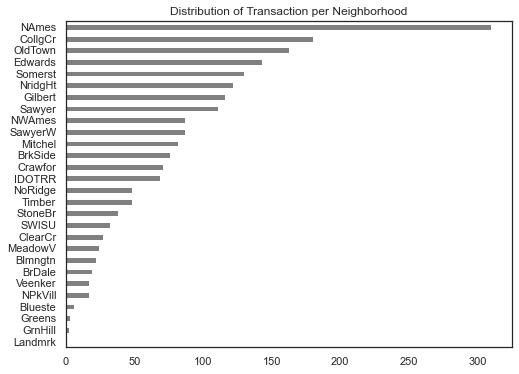

In [23]:
#lets look at the distribution, which neighborhood has most properties sold and also above the 75% quantile?
plt.figure(figsize=(8,6))
df_ames['Neighborhood'].value_counts(ascending=True).plot(kind="barh", color='gray');
plt.title('Distribution of Transaction per Neighborhood')

### Somerst -  is in the above 75% quantile Selling Price and also top 5 in the most sellable neighborhood

In [24]:
#Lets look at our top 2 all time most sellable Neighborhood, NAmes and CollgCr
##NAmes -> How does it looks like in our Average Price per Neigborhood?
if is_train_dataset:
    print(grouped[(grouped['SalePrice'] < df_ames['SalePrice'].quantile(0.50))])

              SalePrice
Neighborhood           
Mitchel        160000.0
NPkVill        143000.0
NAmes          141000.0
Blueste        137500.0
Landmrk        137000.0
SWISU          136200.0
Sawyer         135000.0
BrkSide        128000.0
Edwards        125000.0
OldTown        120000.0
BrDale         105500.0
IDOTRR         102000.0
MeadowV         92450.0


In [25]:
##CollgCr  - How does it looks like in our Average Price per Neigborhood?
if is_train_dataset:
    print(grouped[(grouped['SalePrice'] < df_ames['SalePrice'].quantile(0.75))])

              SalePrice
Neighborhood           
CollgCr        200000.0
Crawfor        199500.0
Blmngtn        192250.0
Greens         190000.0
NWAmes         185000.0
SawyerW        181000.0
Gilbert        180750.0
Mitchel        160000.0
NPkVill        143000.0
NAmes          141000.0
Blueste        137500.0
Landmrk        137000.0
SWISU          136200.0
Sawyer         135000.0
BrkSide        128000.0
Edwards        125000.0
OldTown        120000.0
BrDale         105500.0
IDOTRR         102000.0
MeadowV         92450.0


- NAmes has most demand and the mean average SalePrice is below 50% quantile, lets explore is it a good place to buy, means the price is below mean and the quality is not bad?
- CollgCr, the second one in demand has a bit higher mean, which is below 75% quantile.***


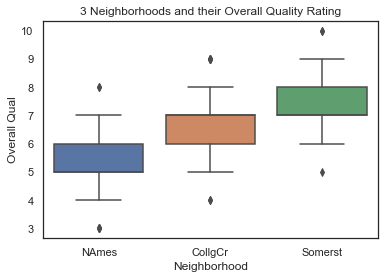

In [26]:
#lets look at the Overall Quality of our three interesting property
#Somerst - above 75% quantile in SalePrice median, and also top 5 in our Top Selling Properties
#NAmes - Top1 selling, SalePrice is below 50% quantile
#CollgCr - Top2 selling, SalePrice median is above 50% quantile

df_interesting_neighborhood = df_ames[((df_ames['Neighborhood'] == 'Somerst') |  (df_ames['Neighborhood'] == 'NAmes')  | (df_ames['Neighborhood'] == 'CollgCr'))]
sns.boxplot(data=df_interesting_neighborhood, x='Neighborhood', y='Overall Qual');
plt.title("3 Neighborhoods and their Overall Quality Rating");

### The three mentioned neigborhood has average quality between 5-8
- NAmes with average Overall Quality of 5-6 has SalePrice on the below 50% quantile, which means that it has above average quality and cheap price

- CollgCR is the second sellable, and the quality is 6-7, and it  has average SalepPrice > 50% quantile 

- Somerst, has the average Overall Quality of 7-8, and it's average SellingPrice is > 75% 

#### While analysing categorical features, let us classify whether they are nominal or ordinal, and this might be helpful when doing feature engineering

In [27]:
var_categorical

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type'],
      dtype='object')

In [28]:
#Classification of Categorical variables

#ordinal data has a predetermined or natural order
ord_var = ['Street','Lot Shape', 'Utilities','Land Slope','Exter Qual',
       'Exter Cond','Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2','Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Finish','Garage Qual',
       'Garage Cond', 'Paved Drive']


#Nominal data is classified without a natural order or rank
nom_var = ['MS Zoning','Land Contour','Lot Config','Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type','Foundation','Heating',
       'Garage Type', 'Sale Type']


## Cleanup and Impute Null Values 

In [29]:
#missing value - Lot Fontage, how to we fill the missing values?
#check the relation with Lot Area

df_ames[['Lot Frontage', 'Lot Area']].corr()

,Lot Frontage,Lot Area
Lot Frontage,1.000000,0.574024
Lot Area,0.574024,1.000000


In [30]:
#use linear regression, to prodict the Lot Frontage it is missing
if is_train_dataset:
    df_ames_lot = df_ames[['Lot Frontage', 'Lot Area']]
    df_ames_lot.dropna(inplace=True)
    X = df_ames_lot[['Lot Area']]
    y = df_ames_lot['Lot Frontage']

    # Instantiate
    model = LinearRegression()

    # Fit
    model.fit(X, y)

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [31]:
if is_train_dataset:
    coef = model.coef_
    intercept=model.intercept_
else:
    coef = 0.00267326
    intercept=43.33160738510908

print(f"Coef:{coef}, Intercept: {intercept}")

Coef:[0.00267326], Intercept: 43.33160738510908


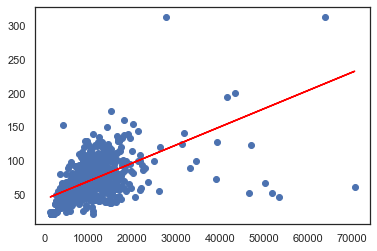

In [32]:
#Plotting thre regression model to visualize the linear relationship of two variables - Lot Area and Lot Frontage
if is_train_dataset:
    plt.scatter(x=df_ames_lot['Lot Area'], y=df_ames_lot['Lot Frontage'])
    plt.plot(df_ames_lot['Lot Area'], coef*df_ames_lot['Lot Area'] +intercept, color='red');


In [33]:
#We can then replace the null Lot Frontage with this formula: coef*lotarea +intercept
df_ames['Lot Frontage'] = df_ames.apply(lambda x: int(x['Lot Area']*coef + intercept) if np.isnan(x['Lot Frontage']) else x['Lot Frontage'],axis =1)

In [34]:
#replace with the Year the house is built if the Garage Year is not populated
df_ames['Garage Yr Blt'] = df_ames.apply(lambda x: x['Year Built'] 
                                     if np.isnan(x['Garage Yr Blt']) else x['Garage Yr Blt'],axis =1)

In [35]:
#confirm that 'Lot Frontage' and 'Garage Yr Blt' have no more nulls
print("Garage Yr Blt missing value:", df_ames['Garage Yr Blt'].isnull().sum())
print("Lot Frontage missing value:", df_ames['Lot Frontage'].isnull().sum())

Garage Yr Blt missing value: 0
Lot Frontage missing value: 0


In [36]:
#check for variables related to basement

df_ames[['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']].head()

#Total Bsmt SF' is the sum of the 3 variables: 'BsmtFin SF 1' , 'BsmtFin SF 2' and 'Bsmt Unf SF'


,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
0,533.0,0.0,192.0,725.0
1,637.0,0.0,276.0,913.0
2,731.0,0.0,326.0,1057.0
3,0.0,0.0,384.0,384.0
4,0.0,0.0,676.0,676.0


**Observation**

- We can drop 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF' as they are correlated withTotal Bsmt SF

- For this notebook version, i am not removing and see if Lasso can address this

```python
#df_ames.drop(columns=['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF'], inplace=True)
```

In [37]:
#check the fields related to the size of the house

df_ames[['1st Flr SF', '2nd Flr SF','Low Qual Fin SF','Gr Liv Area']].head()

#'Gr Liv Area' is the sum of '1st Flr SF', '2nd Flr SF' and 'Low Qual Fin SF'

,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area
0,725,754,0,1479
1,913,1209,0,2122
2,1057,0,0,1057
3,744,700,0,1444
4,831,614,0,1445


**Observation**

- We can drop '1st Flr SF', '2nd Flr SF','Low Qual Fin SF' as they are correlated with 'Gr Liv Area'

- For this notebook version, i am not removing and see if Lasso can address this

```python
#df_ames.drop(columns=['1st Flr SF', '2nd Flr SF','Low Qual Fin SF'], inplace=True)
```

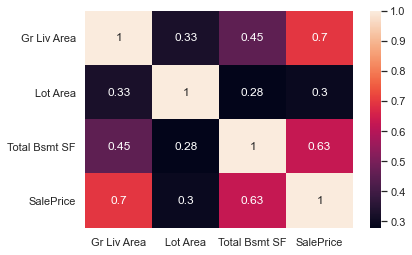

In [38]:
#Now look at the features related to Area and it correlation to SalePrice
if is_train_dataset:
    sns.heatmap(df_ames[['Gr Liv Area', 'Lot Area', 'Total Bsmt SF', 'SalePrice']].corr(),annot=True)

***Lot Area has low correlation with regards to Sale Price. 'Gr Liv Area' and 'Total Bsmt SF' has better correlation, we can add this two fields in our feature engineering***

In [39]:
#check what else has missing values
miss_catch = df_ames.isnull().sum()[df_ames.isnull().sum()>0]
miss_catch.index

Index(['Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [40]:
df_ames[miss_catch.index].dtypes


Mas Vnr Type       object
Mas Vnr Area      float64
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Fireplace Qu       object
Garage Type        object
Garage Finish      object
Garage Cars       float64
Garage Area       float64
Garage Qual        object
Garage Cond        object
dtype: object

In [41]:
#select the categorical variables with null values
miss_catch_categ = df_ames[miss_catch.index].select_dtypes(include = 'object').columns
miss_catch_categ

Index(['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [42]:
#select the numeric variables with null values
miss_catch_numeric = df_ames[miss_catch.index].select_dtypes(exclude = 'object').columns
miss_catch_numeric

Index(['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars',
       'Garage Area'],
      dtype='object')

In [43]:
#Fill numerical with 0, and categorical with 'NA'
df_ames.fillna(df_ames[miss_catch_categ].fillna('missing'), inplace=True)
df_ames.fillna(df_ames[miss_catch_numeric].fillna(0), inplace=True)

In [44]:
#check again missing values
df_ames.isnull().sum()[df_ames.isnull().sum()>0]

Series([], dtype: int64)

## CHECK  OUTLIERS (only for train dataset)

Wikipedia definition,
In statistics, an outlier is an observation point that is distant from other observations.

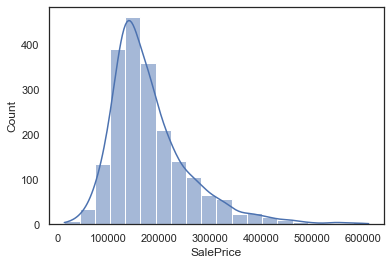

In [45]:
#check for outliers based on Sale Price
if is_train_dataset:
    sns.histplot(df_ames['SalePrice'],bins=20,kde=True);

***Target variable 'SalePrice' is right skewed, tail on the right***

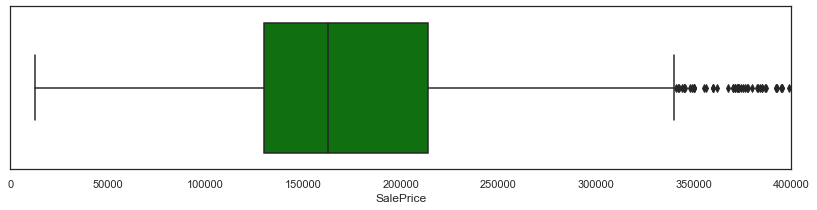

In [46]:
#Lets take a closer look.
if is_train_dataset:
    plt.figure(figsize=(14,3))
    sns.boxplot(x='SalePrice', data=df_ames, color='green')
    plt.xlim(0,400000)


In [47]:
if is_train_dataset:
    print(df_ames['SalePrice'].describe())

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64


## IQR
Wikipedia Definition

- The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

- In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [48]:
#lets find hte IQR of 'SalePrice'
if is_train_dataset:
    Q1 = df_ames['SalePrice'].quantile(0.25)
    Q3 = df_ames['SalePrice'].quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)

84175.0


In [49]:
#We will be removing Below .25 quantile plus the 1.5 x IQR 
#and above .75 quantile  plus the 1.5 x IQR
if is_train_dataset:
    print("Below: ", (Q1 - 1.5 * IQR))
    print("Above: ", (Q3 + 1.5 * IQR))

Below:  3562.5
Above:  340262.5


In [50]:
df_ames.shape

(2051, 77)

In [51]:
#drop those records except for test dataset
if is_train_dataset:
    df_ames = df_ames[(df_ames['SalePrice'] >= (Q1 - 1.5 * IQR) ) & (df_ames['SalePrice'] <= (Q3 + 1.5 * IQR))]

In [52]:
df_ames.shape

(1957, 77)

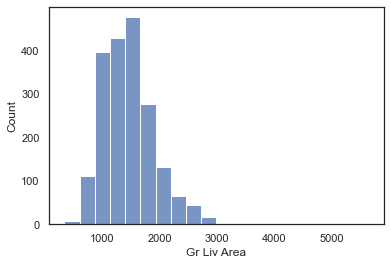

In [53]:
#check for outliers based on Gr Liv Area
sns.histplot(df_ames['Gr Liv Area'],bins=20);

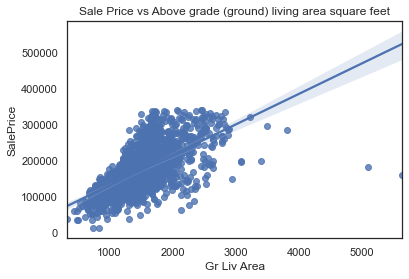

In [54]:
#visualizing the 'Gr Liv Area' with 'SalePrice' and detect outlier
if is_train_dataset:
    sns.regplot(x="Gr Liv Area", y="SalePrice", data=df_ames).set_title('Sale Price vs Above grade (ground) living area square feet');

(0.0, 6000.0)

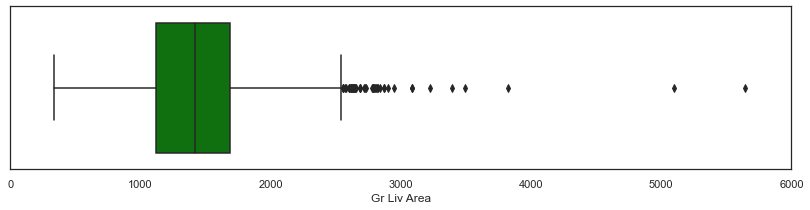

In [55]:
#visualizing the 'Gr Liv Area'
plt.figure(figsize=(14,3))
sns.boxplot(x='Gr Liv Area', data=df_ames, color='green')
plt.xlim(0,6000)

In [56]:
df_ames.shape

(1957, 77)

In [57]:
#just by looking, we want to drop the extreme outlier only.. select all records above 5000 sq ft
if is_train_dataset:
    df_ames[(df_ames['Gr Liv Area'] > 5000)]

In [58]:
#drop the 2 records, except for test dataset
if is_train_dataset:
    df_ames = df_ames[(df_ames['Gr Liv Area'] <= 5000)]

In [59]:
df_ames.shape

(1955, 77)

In [60]:
#last check before saving
df_ames.isnull().sum()[df_ames.isnull().sum()>0].sort_values()

Series([], dtype: int64)

#### Save the file for the next notebook.. feature engineering

In [61]:
#saved the preprocessed files
if is_train_dataset:
    df_ames.to_csv("../datasets/train_preproc_final.csv")
    print("Successfully saved train_preproc_final.csv")
else:
    df_ames.to_csv("../datasets/test_preproc_final.csv")
    print("Successfully saved test_preproc_final.csv")

Successfully saved train_preproc_final.csv


##  Imputation and Cleanup Summary

**Population of NULL values:**
- Fill null values of 'Lot Frontage' from the linear regression with 'Lot Area' (16%)
- Fill 'Garage Yr Buit' with the year the house is built (5%)
- Fill with 0 (zero):
    - ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars',
       'Garage Area']
- Fill with 'missing':
    - ['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Fence']
      
**Dropped the following fields as their null values > 80%
- 'Alley','Pool QC', 'Misc Feature',Fence

**For train dataset**

    - the outliers are removed
        - 'SalePrice' (94 records)
        - 'Gr Liv Area' (2 records)
    

# EDA about Neighborhood, SalePrice and Overall Quality

- The higher the Overall Quality, the higher the Average Sale Price

### We look at the Neighborhood, 3 catches our attention during EDA, NAmes, CollgCR and SOmerst
- NAmes with average Overall Quality of 5-6 hasaverage  SalePrice  the below 50% quantile, which means that it has above average quality and cheaper price

- CollgCR is the second sellable, and the quality is 6-7, and it has average SalepPrice > 50% quantile 

- Somerst, has the average Overall Quality of 7-8, and it's average SellingPrice is > 75% (No wonder it's pricey!)

***We can see how the quality drives price and demand in the Neighborhood*** 